In [1]:
import glob
import os

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
bg = cv.imread("opencv_image_analysis/backgroung.png")
shrimp = cv.imread("opencv_image_analysis/shrimp.png")

In [9]:
xcenter, ycenter, patch_width, patch_height = [308, 1288, 592, 381]
shrimp_focused = shrimp[
    ycenter - patch_height // 2 : ycenter + patch_height // 2,
    xcenter - patch_width // 2 : xcenter + patch_width // 2,
]
bg_focused = bg[
    ycenter - patch_height // 2 : ycenter + patch_height // 2,
    xcenter - patch_width // 2 : xcenter + patch_width // 2,
]

In [31]:
cv.imwrite("./opencv_image_analysis/shrimp_focused.png", shrimp_focused)

True

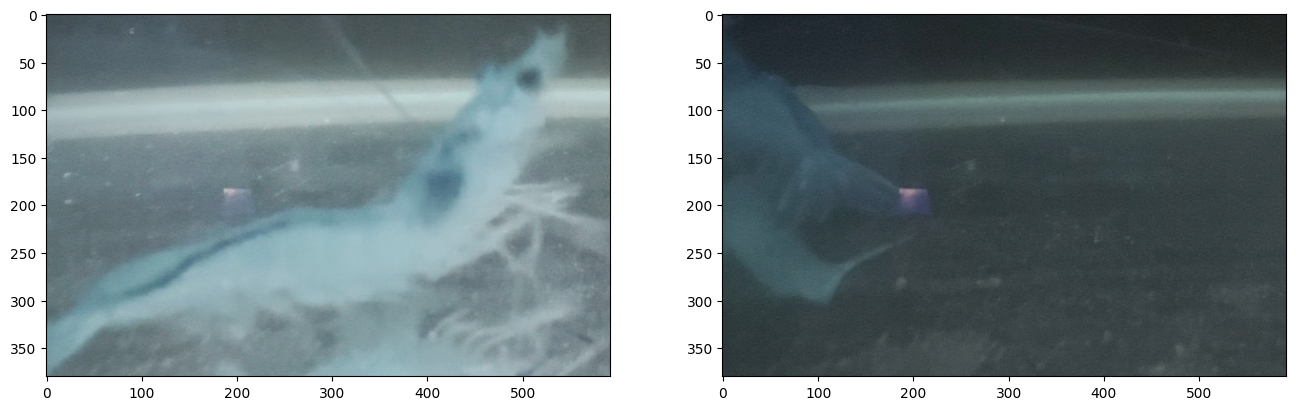

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].imshow(shrimp_focused)
ax[1].imshow(bg_focused)
plt.show()

In [14]:
np.linalg.norm(shrimp_focused[:,:,0])

60024.22784176403

In [21]:
from sklearn.preprocessing import normalize

grey_shrimp_focused = cv.cvtColor(shrimp_focused, cv.COLOR_RGB2GRAY)
grey_bg_focused = cv.cvtColor(bg_focused, cv.COLOR_RGB2GRAY)

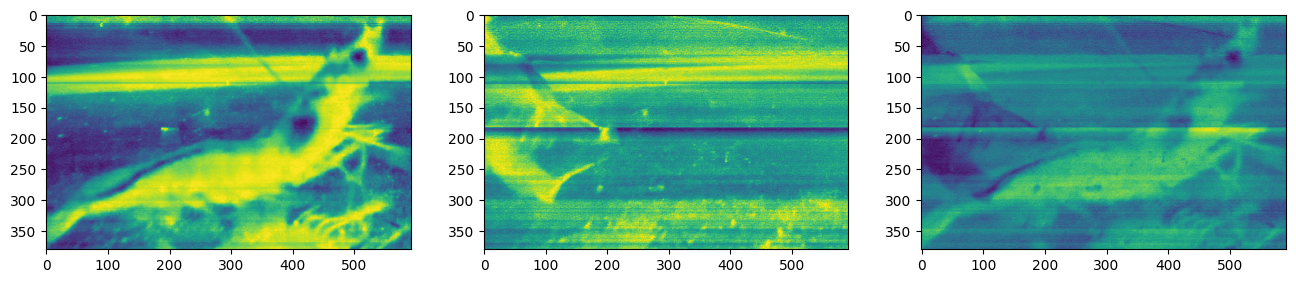

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
norm_grey_shrimp_focused = normalize(grey_shrimp_focused, "max")
norm_grey_bg_focused = normalize(grey_bg_focused, "max")
ax[0].imshow(norm_grey_shrimp_focused)
ax[1].imshow(norm_grey_bg_focused)
ax[2].imshow(norm_grey_shrimp_focused-norm_grey_bg_focused)
plt.show()

In [5]:
grey_shrimp_focused = cv.cvtColor(shrimp_focused, cv.COLOR_RGB2GRAY)

In [69]:
backSub = cv.createBackgroundSubtractorMOG2()
fgMask = backSub.apply(adj_img)

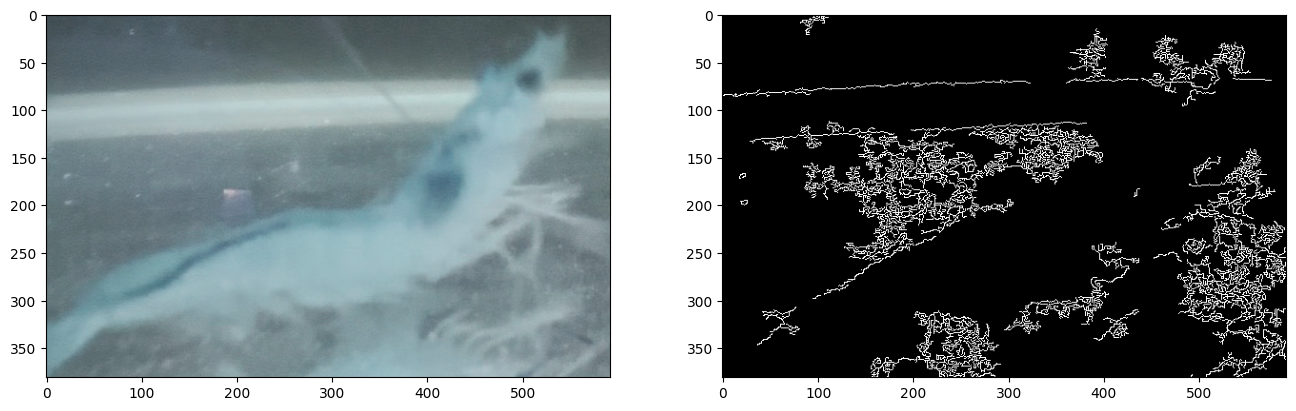

In [6]:
edges = cv.Canny(shrimp_focused[:, :, 0], 0, 100)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].imshow(shrimp_focused)
ax[1].imshow(edges, cmap="gray")
plt.show()

In [64]:
adj_img = np.zeros(shrimp_focused.shape, dtype="uint8")
adj_img[:, :, 0] = cv.equalizeHist(shrimp_focused[:, :, 0])
adj_img[:, :, 1] = cv.equalizeHist(shrimp_focused[:, :, 1])
adj_img[:, :, 2] = cv.equalizeHist(shrimp_focused[:, :, 2])


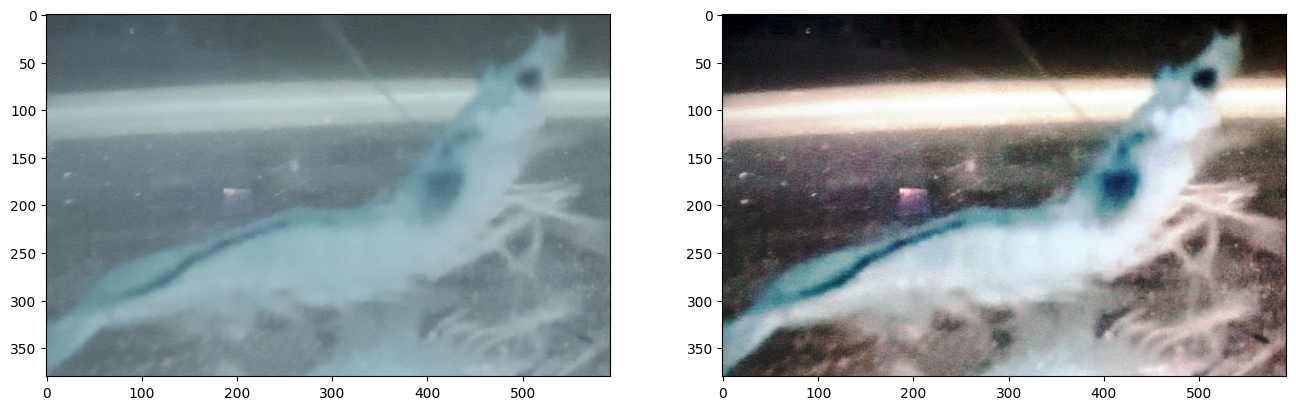

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].imshow(shrimp_focused)
ax[1].imshow(adj_img)
plt.show()

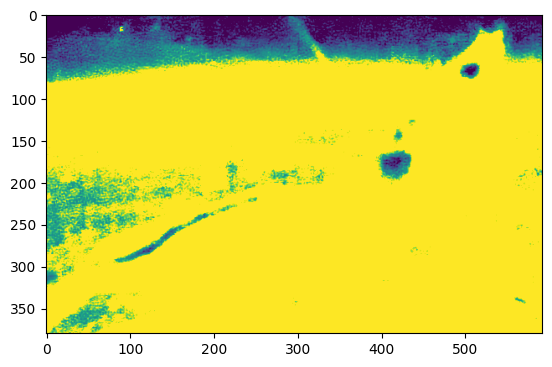

In [98]:
plt.imshow(np.clip(adj_img[:,:,0], a_min=10, a_max=60))

In [63]:
shrimp_focused.dtype

dtype('uint8')